Aishik Mandal(18EC3AI21)
## Question 9

Generate 500 random vectors $x^{(i)} \in \mathbb{R}^2$ for i = 1, 2, . . . , 500
from a standard normal distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
s = np.random.normal(size = 1000)
X = np.reshape(s, (500, 2))  

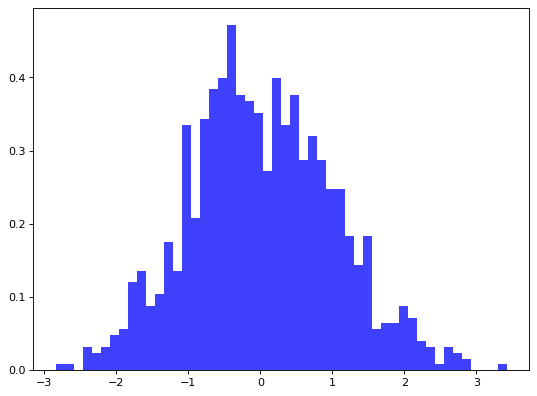

In [26]:
figure(figsize=(8, 6), dpi=80)
plt.hist(s, 50, density=1, facecolor='b', alpha=0.75)
plt.show()

In [4]:
X[0:10]

array([[-0.88218486,  1.96851935],
       [ 0.19972265,  0.37958278],
       [ 0.5640895 ,  0.19677635],
       [ 0.37143423, -1.10802765],
       [-0.97188485, -0.09119528],
       [ 2.08391211,  2.26222222],
       [-0.33784017, -0.71529528],
       [-0.38887791,  1.93764978],
       [-1.41971589,  0.48255118],
       [ 0.84408838, -0.17628305]])

For i = 1, 2, . . . , 500,
$$
y = \begin{cases} +1  &  x_1^{(i)} x_2^{(i)} \geq 0 \\ -1 & otherwise \end{cases}
$$

In [5]:
y = []
for i in range(500) :
    val = -1
    if X[i][0]*X[i][1] >= 0 :
        val = 1
    y.append(val)

In [6]:
y[:10]

[-1, 1, 1, -1, 1, 1, 1, -1, -1, -1]

Fit a polynomial least squares classifier of degree 2 to the data set using the
polynomial <br>
$$ \tilde{f} (x) = θ _1 + θ _2 x _1 + θ _3 x _2 + θ _4 x _1 x _2 + θ _5 x ^2_1 + θ _6 x ^2_2 $$

In [7]:
theta = np.random.rand(6) # Using least squares classification to get the best possible value of theta
print(np.shape(theta))

(6,)


In [8]:
x_val = np.array(  [np.ones(500), X[:,0], X[:,1] , X[:,0]*X[:,1], X[:,0]**2 ,X[:,1]**2 ])
x_val = np.transpose(x_val)
print(np.shape(x_val))

(500, 6)


In [9]:
pseudo_inv = np.dot((np.linalg.inv(np.dot(np.transpose(x_val), x_val))), np.transpose(x_val))
theta = np.dot(pseudo_inv, y)

In [10]:
print(theta)

[ 0.10758651 -0.02134877 -0.0453092   0.65165672 -0.02670468 -0.02086077]


In [11]:
y_hat = np.dot(x_val, theta)
y_tilde = [1 if i > 0 else -1 for i in y_hat]

In [12]:
true_pos = 0
true_neg = 0
false_pos = 0
false_neg = 0
for i in range(500):
    if y[i] == y_tilde[i]:
        if y[i] == 1 :
            true_pos += 1
        else:
            true_neg += 1
    else:
        if y[i] == -1:
            false_pos += 1
        else:
            false_neg += 1

(a) Give the error rate of the classifier using the confusion matrix.

In [13]:
print("True Positives = ", true_pos, " , True negatives = ", true_neg, ", False Positives = ", false_pos, " , False negatives = ", false_neg)

True Positives =  260  , True negatives =  186 , False Positives =  53  , False negatives =  1


In [14]:
acccuracy = (true_pos + true_neg )/5
error_Rate = (false_pos + false_neg )/500
print("Acccuracy = ", acccuracy, " and Error Rate = ", error_Rate)

Acccuracy =  89.2  and Error Rate =  0.108


(b) Show the regions in the $ \mathbb{R}^2 $ plane where the classifier model $ \hat{f}  (x) = 1 $ and
$ \hat{f} (x) = −1 $.

In [15]:
x_one = []
y_one = []
for i in range(500):
    if y_tilde[i] == 1 :
        x_one.append(X[i][0])
        y_one.append(X[i][1])
x_neg = []
y_neg = []
for i in range(500):
    if y_tilde[i] == -1 :
        x_neg.append(X[i][0])
        y_neg.append(X[i][1])

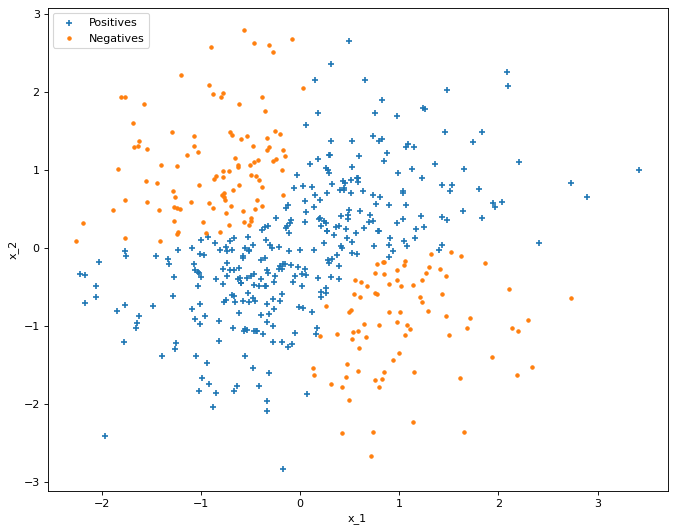

In [16]:
figure(figsize=(10, 8), dpi=80)
plt.scatter(x_one, y_one , marker = '+', label = 'Positives')
plt.scatter(x_neg, y_neg , marker = '.', label = 'Negatives')
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend(loc='upper left')
plt.show()

The blue regions are where $ \hat{f}  (x) = 1 $ and the orange regions are where
$ \hat{f} (x) = −1 $.


(c) Does the second degree polynomial $ g = x _1 x _2 $ classify the generated points
with zero error? Compare the parameters estimated polynomial model
from the data with those of g.

In [17]:
pseudo_inv = np.dot((np.linalg.inv(np.dot(np.transpose(X), X))), np.transpose(X))
theta = np.dot(pseudo_inv, y)

In [18]:
y_hat2 = np.dot(X, theta)
y_tilde2 = [1 if i > 0 else -1 for i in y_hat2]

In [19]:
true_pos = 0
true_neg = 0
false_pos = 0
false_neg = 0
for i in range(500):
    if y[i] == y_tilde2[i]:
        if y[i] == 1:
            true_pos += 1
        else:
            true_neg += 1
    else:
        if y[i] == -1:
            false_pos += 1
        else:
            false_neg += 1

In [20]:
print("True Positives = ", true_pos, " , True negatives = ", true_neg, ", False Positives = ", false_pos, " , False negatives = ", false_neg)
acccuracy = (true_pos + true_neg )/5
error_Rate = (false_pos + false_neg )/500
print("Acccuracy = ", acccuracy, " and Error Rate = ", error_Rate)

True Positives =  131  , True negatives =  129 , False Positives =  110  , False negatives =  130
Acccuracy =  52.0  and Error Rate =  0.48


In [21]:
theta

array([ 0.02264702, -0.03313282])

In [22]:
x_one = []
y_one = []
for i in range(500):
    if y_tilde2[i] == 1:
        x_one.append(X[i][0])
        y_one.append(X[i][1])
x_neg = []
y_neg = []
for i in range(500):
    if y_tilde2[i] == -1:
        x_neg.append(X[i][0])
        y_neg.append(X[i][1])

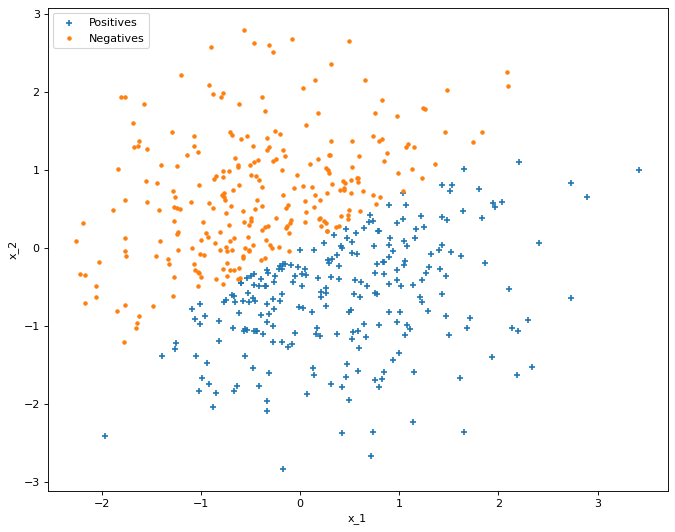

In [23]:
figure(figsize=(10, 8), dpi=80)
plt.scatter(x_one, y_one , marker = '+', label = 'Positives')
plt.scatter(x_neg, y_neg , marker = '.', label = 'Negatives')
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend(loc='upper left')
plt.show()

As we can clearly see that the second degree polynomial, $ g = x _1 x _2 $, is not able to quantify the given results properly. 